In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os

print(tf.__version__)

2.4.0


In [2]:
src_path = r"/Users/astromeria/PycharmProjects/SPWLA_2021_Geolatinas/dataset/separated_wells/train/" #local folder
col_names_x = ["NEU", "GR", "DEN"]
col_names_y = ["VSH"]
col_names_all = col_names_x + col_names_y
wells_list = []
for i in range(1,9): #load all the well log files but well0
    well_data = pd.read_csv(src_path+"well_"+str(i)+".csv")
    well_data= well_data[col_names_all]
    wells_list.append(well_data)
well_all = pd.concat(wells_list)#merge in a single dataframe

#load well 0 data separately for testing
well0 = pd.read_csv((src_path+"well_0.csv"))
well0 = well0[col_names_all]
well0 = well0.dropna()

well_all= well_all.dropna() #delete all the rows that contain at least one empty value

#function to normalice the data
def norm(x, train_stats):
  return (x - train_stats['mean']) / train_stats['std']

def denorm(x, train_status):
    return (x + train_stats['mean']) * train_stats['std']

#obtain stats from training data for normalization



#separate in x (inputs) and y(targets or outputs)
x_train = well_all[col_names_x]
y_train = well_all[col_names_y]
x_test = well0[col_names_x]
y_test = well0[col_names_y]

train_stats = x_train.describe()
train_stats = train_stats.transpose()
print(train_stats)

x_train = norm(x_train, train_stats)
x_test = norm(x_test, train_stats)


       count       mean        std       min        25%        50%        75%  \
NEU  42026.0   0.188701   0.078894 -0.003400   0.144700   0.178800   0.220177   
GR   42026.0  46.132715  48.063054  4.588597  19.921038  35.763005  53.401405   
DEN  42026.0   2.407358   0.163095  1.626600   2.258700   2.412200   2.543502   

          max  
NEU    0.6454  
GR   873.7680  
DEN    3.0896  


Epoch 1/100


2021-11-23 19:34:49.516173: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-23 19:34:49.617597: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1182/1182 - 1s - loss: 0.0046 - mae: 0.0387 - mse: 0.0046 - val_loss: 4.8692e-04 - val_mae: 0.0151 - val_mse: 4.8692e-04
Epoch 2/100
1182/1182 - 1s - loss: 0.0027 - mae: 0.0308 - mse: 0.0027 - val_loss: 5.4649e-04 - val_mae: 0.0181 - val_mse: 5.4649e-04
Epoch 3/100
1182/1182 - 1s - loss: 0.0025 - mae: 0.0290 - mse: 0.0025 - val_loss: 5.2096e-04 - val_mae: 0.0200 - val_mse: 5.2096e-04
Epoch 4/100
1182/1182 - 1s - loss: 0.0024 - mae: 0.0283 - mse: 0.0024 - val_loss: 1.6376e-04 - val_mae: 0.0088 - val_mse: 1.6376e-04
Epoch 5/100
1182/1182 - 1s - loss: 0.0023 - mae: 0.0278 - mse: 0.0023 - val_loss: 7.1153e-04 - val_mae: 0.0199 - val_mse: 7.1153e-04
Epoch 6/100
1182/1182 - 1s - loss: 0.0022 - mae: 0.0274 - mse: 0.0022 - val_loss: 4.1094e-04 - val_mae: 0.0147 - val_mse: 4.1094e-04
Epoch 7/100
1182/1182 - 1s - loss: 0.0021 - mae: 0.0269 - mse: 0.0021 - val_loss: 3.8641e-04 - val_mae: 0.0137 - val_mse: 3.8641e-04
Epoch 8/100
1182/1182 - 1s - loss: 0.0021 - mae: 0.0266 - mse: 0.0021 - val_loss:

Epoch 63/100
1182/1182 - 1s - loss: 0.0017 - mae: 0.0234 - mse: 0.0017 - val_loss: 4.3952e-04 - val_mae: 0.0150 - val_mse: 4.3952e-04
Epoch 64/100
1182/1182 - 1s - loss: 0.0018 - mae: 0.0234 - mse: 0.0018 - val_loss: 6.8367e-04 - val_mae: 0.0186 - val_mse: 6.8367e-04
Epoch 65/100
1182/1182 - 1s - loss: 0.0017 - mae: 0.0234 - mse: 0.0017 - val_loss: 6.8803e-04 - val_mae: 0.0197 - val_mse: 6.8803e-04
Epoch 66/100
1182/1182 - 1s - loss: 0.0017 - mae: 0.0235 - mse: 0.0017 - val_loss: 4.3483e-04 - val_mae: 0.0137 - val_mse: 4.3483e-04
Epoch 67/100
1182/1182 - 1s - loss: 0.0018 - mae: 0.0233 - mse: 0.0018 - val_loss: 3.7786e-04 - val_mae: 0.0129 - val_mse: 3.7786e-04
Epoch 68/100
1182/1182 - 1s - loss: 0.0018 - mae: 0.0233 - mse: 0.0018 - val_loss: 5.1800e-04 - val_mae: 0.0167 - val_mse: 5.1800e-04
Epoch 69/100
1182/1182 - 1s - loss: 0.0018 - mae: 0.0232 - mse: 0.0018 - val_loss: 3.9245e-04 - val_mae: 0.0129 - val_mse: 3.9245e-04
Epoch 70/100
1182/1182 - 1s - loss: 0.0018 - mae: 0.0234 - mse

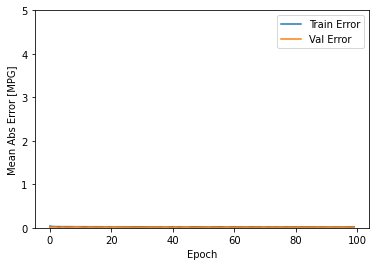

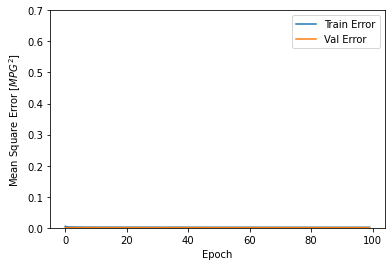

In [3]:
#function that returns the model architecture
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse',])
  return model

#training history plotting function
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.7])
  plt.legend()
  plt.show()

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
checkpoint = keras.callbacks.ModelCheckpoint( "/Users/astromeria/Documents/SPWLA_competition/weights/vshale_norm/model_norm_vsh.h5", save_best_only=True, monitor = "val_loss")

#create a model instance
model = build_model()
EPOCHS = 100 #number of iterations for training

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.1, verbose=2, #just 10% for validation to use most of the data on training
  callbacks=[checkpoint])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_history(history)

59/59 - 0s - loss: 0.0463 - mae: 0.0779 - mse: 0.0463
Testing set Mean Abs Error:  0.08 MPG


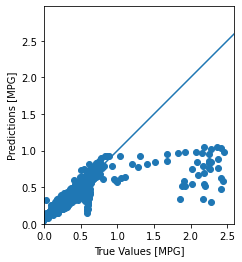

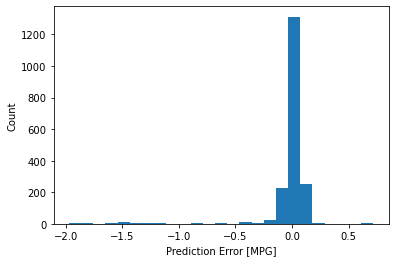

In [4]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

#test on well0
test_predictions = model.predict(x_test).flatten()
predictions_file= os.path.join(os.getcwd(), "predictions_vhs_well0.npy")
np.save(predictions_file, test_predictions)

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


error = test_predictions - np.asarray(y_test).flatten()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

            NEU        GR       DEN
22625  4.102503  0.200212 -1.452276
22626  4.102503  0.185910 -1.452276
22627  4.102503  0.207182 -1.452276
22628  4.102503  0.264201 -1.452276
22629  4.102503  0.296558 -1.452276
7084
7084
7084
predictions_not norm


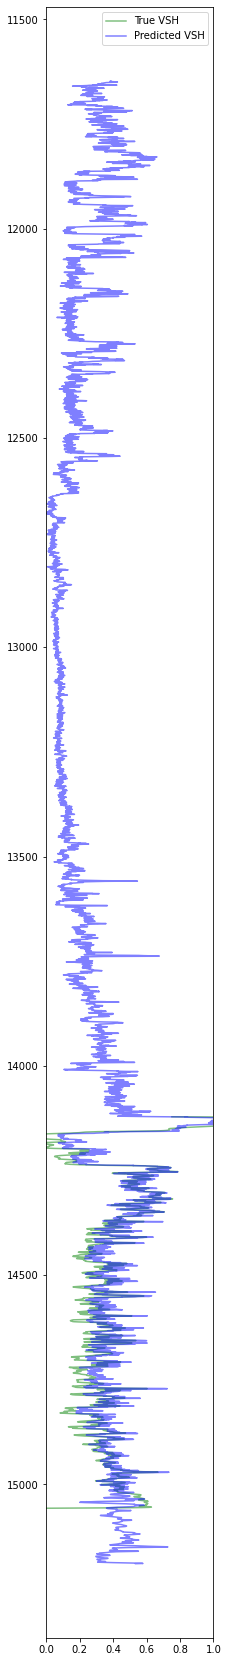

In [5]:
model = build_model()
weights_path = r"/Users/astromeria/Documents/SPWLA_competition/weights/vshale_norm/model_norm_vsh.h5"
model.load_weights(weights_path)

#prepare dataset for prediction for the whole well

well0 = pd.read_csv((src_path+"well_0.csv"))
well0 = well0[col_names_all+["DEPTH"]]
well0 = well0[well0["NEU"].notna()]
well0 = well0[well0["GR"].notna()]
well0 = well0[well0["DEN"].notna()]

#take the columns needed for performing prediction and save npy file

well_0_x = well0[col_names_x]
well_0_y = well0[col_names_y]
well_0_x = norm(well_0_x, train_stats)

print(well_0_x.head())
test_predictions = model.predict(well_0_x).flatten()
predictions_file= os.path.join(os.getcwd(), "predictions_vhs_well0_whole_normed.npy")
np.save(predictions_file, test_predictions)
#predict


fig = plt.figure(figsize=(3,30))
ax = fig.add_subplot(1,1,1)

#Set up the plot axes

#ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan = 1) # Gamma-ray



#Title of well logs plot


# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines

print(len(well0["DEPTH"]))
print(len(well0["VSH"]))
print(len(test_predictions))

# Shale volume truth
ax.plot(well0["VSH"], well0["DEPTH"], color = "green", label="True VSH", alpha=0.5)
ax.plot( test_predictions, well0["DEPTH"], color = "blue", label="Predicted VSH", alpha=0.5)
print("predictions_not norm")

plt.xlim([0,1])
plt.gca().invert_yaxis()
plt.legend()
#plt.savefig("well_plot.png")
plt.show()
